<a href="https://colab.research.google.com/github/evanlin917/breastCancerML-RandomForest/blob/main/breastCancerML_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data dimensions:  (569, 30)
prediction:  [1]
true value:  1
random forest accuracy:  0.9790209790209791
best params:  {'n_estimators': 25}


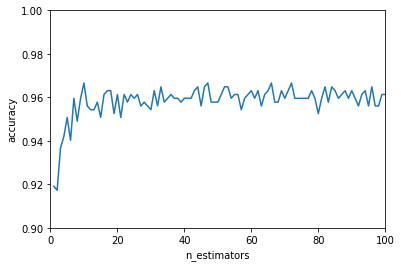

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


0.972027972027972

<Figure size 432x288 with 0 Axes>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_breast_cancer

#setting up the data frame using pandas to house the breast cancer data set
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

#defining the feature matrix and the target array using numpy
x = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions: ', x.shape)

#importing the necessary package to creat the random forest model
from sklearn.ensemble import RandomForestClassifier

#splitting the breast cancer data set into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101)

#creating the random forest model
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)

#utilizing the model created to make a prediction
first_row = x_test[0]
print("prediction: ", randForest.predict([first_row]))
print("true value: ", y_test[0])

#calculating the accuracy of the random forest model
print("random forest accuracy: ", randForest.score(x_test, y_test))

#using grid search to find the optimal choice of parameters to create a random forest model by
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}

#creating a new random forest model and applying grid search to it
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv = 5)
gs.fit(x, y)
print("best params: ", gs.best_params_)

#re-defining the grid search towards the creation of an elbow graph
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators' : n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv = 5)
gs.fit(x, y)
scores = gs.cv_results_['mean_test_score']

#visualizing the new results of the grid search
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()
plt.savefig("elbow_graph.png")

#re-defining the random forest model created to have the optimal number of decision trees
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(x, y)

#preforming feature importance on a new forest model created with the optimal number of decision trees and applied towards the training data set
newRandForest = RandomForestClassifier(n_estimators = 10, random_state = 111)
newRandForest.fit(x_train, y_train)
ft_imp = pd.Series(newRandForest.feature_importances_, index = cancer_data.feature_names).sort_values(ascending = False) #sorts the values in descending order
ft_imp.head(10) #features containing "worst" were found to have higher importance

#building another random forest model based on the features with higher importance
selectedRF = RandomForestClassifier(n_estimators = 10, random_state = 111)
selectedRF.fit(x_train, y_train)
selectedRF.score(x_test, y_test)

#finding features whose name includes "worst"
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

#storing features with "worst" included in the name within a data frame and splitting the data into training and test data sets
x_worst = df[worst_cols]
selected_x_train, selected_x_test, selected_y_train, selected_y_test = train_test_split(x_worst, y, random_state = 101)

#fitting the random forest model of selected features according to the new training and test data sets
selectedRF.fit(selected_x_train, selected_y_train)
selectedRF.score(selected_x_test, selected_y_test)